#Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, confusion_matrix, roc_curve, auc,
    precision_recall_curve, classification_report
)
from sklearn.inspection import PartialDependenceDisplay
from sklearn.calibration import calibration_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from IPython.display import display

#Loading the Dataset

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
credited_card_df = pd.read_csv('/content/drive/MyDrive/CreditCard_fraud_detection/dataset/Card_Frauds.csv')

# Data Overview

In [38]:
credited_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
credited_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
credited_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Data Visualization

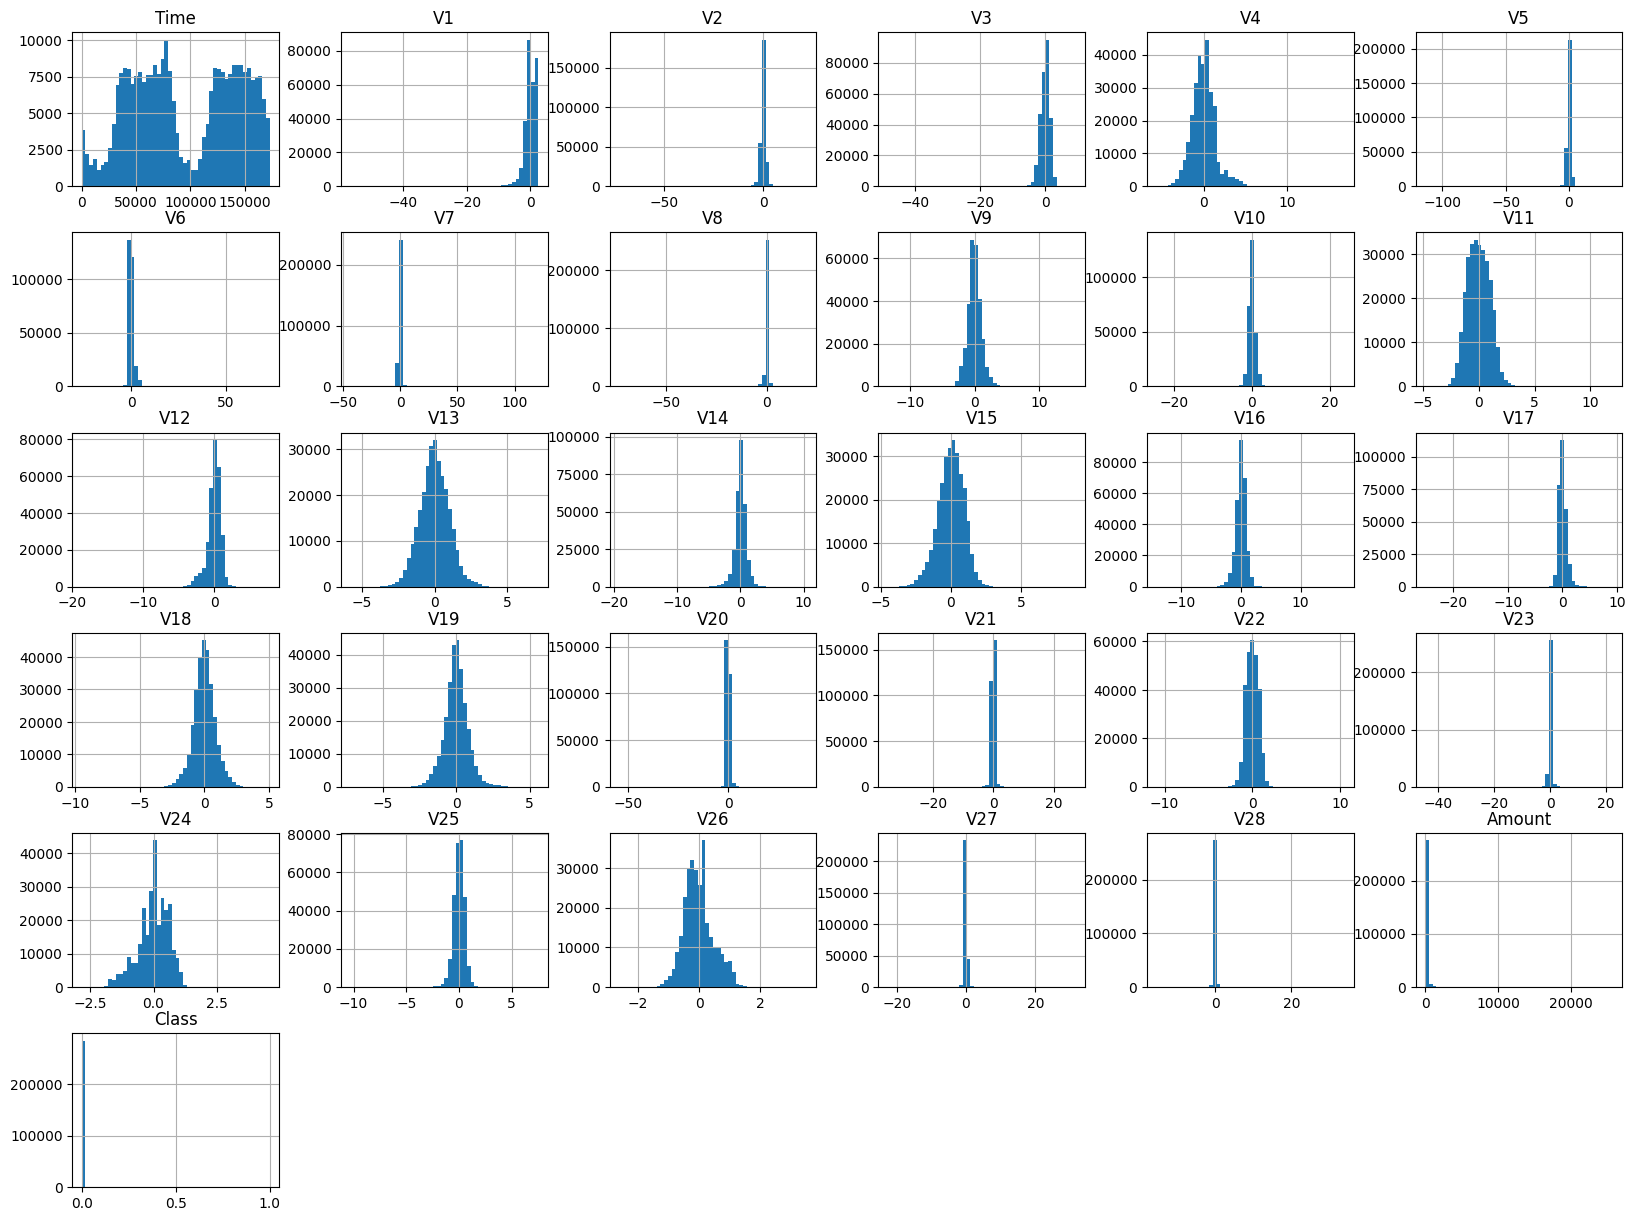

In [41]:
credited_card_df.hist(bins=50, figsize=(20, 15))
plt.show()

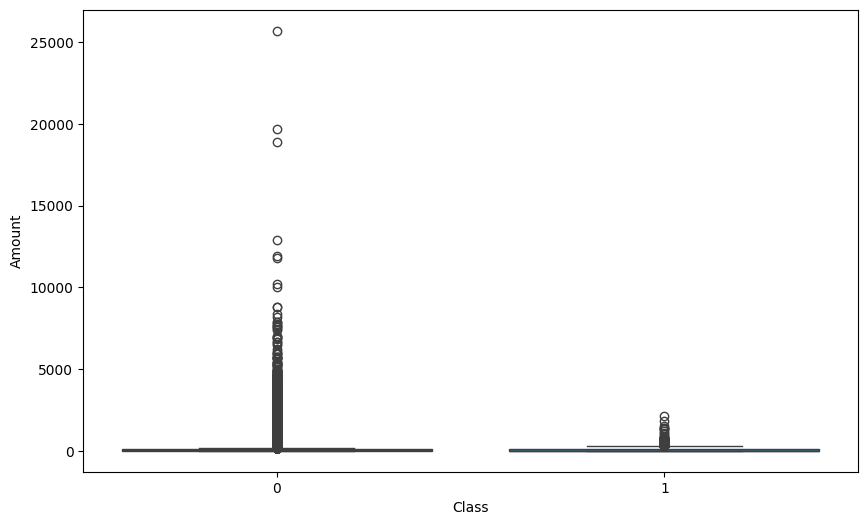

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credited_card_df)
plt.show()

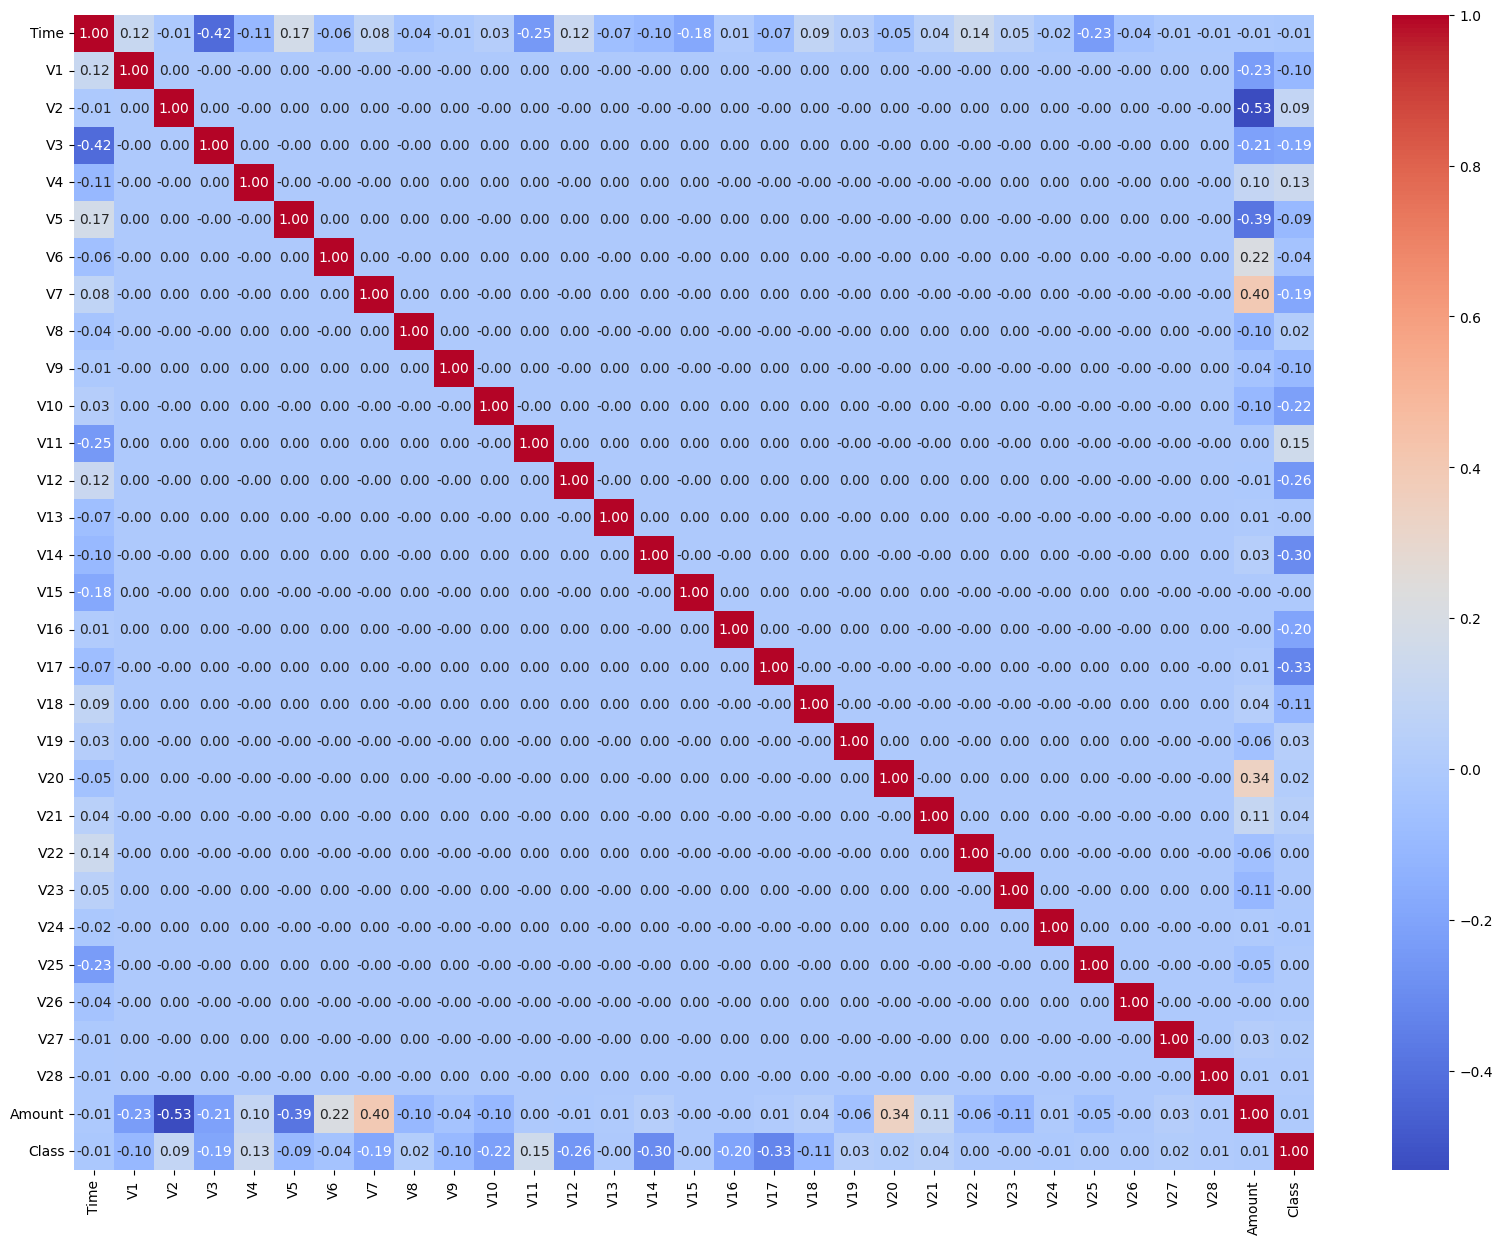

In [43]:
plt.figure(figsize=(20, 15))
sns.heatmap(credited_card_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#Data Preprocessing

##Handling Class Imbalance

In [46]:
legit = credited_card_df[credited_card_df.Class == 0]
fraud = credited_card_df[credited_card_df['Class'] == 1]
legit_sample = legit.sample(n=492)
credited_card_df = pd.concat([legit_sample, fraud], axis=0)
credited_card_df['Class'].value_counts()
credited_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94773.412602,0.046813,-0.059046,-0.019000,0.024077,0.046770,-0.013765,-0.056406,-0.031993,0.055052,...,0.003666,-0.021574,-0.012933,-0.097609,-0.004159,-0.009761,-0.018115,-0.001168,-0.011568,86.993293
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#Train test split

In [47]:
x = credited_card_df.drop('Class', axis=1)
y = credited_card_df['Class']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

#Model Training

In [50]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
ypred = model.predict(x_test)

# Model Evaluation

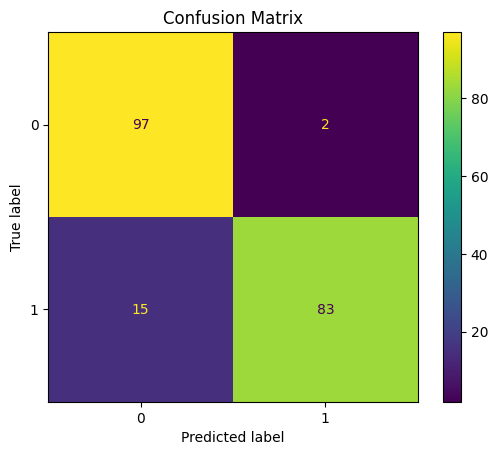

In [52]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.title('Confusion Matrix')
plt.show()

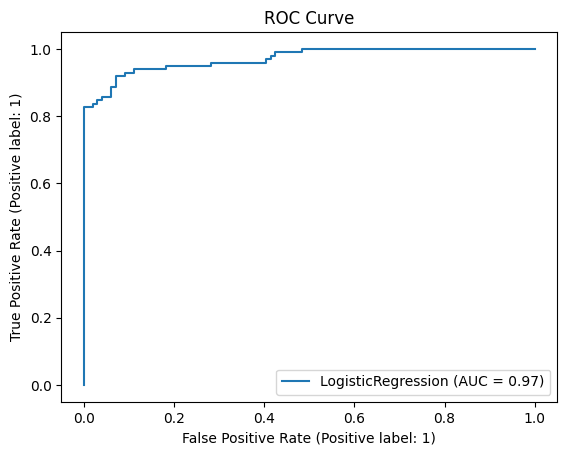

In [17]:
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.title('ROC Curve')
plt.show()

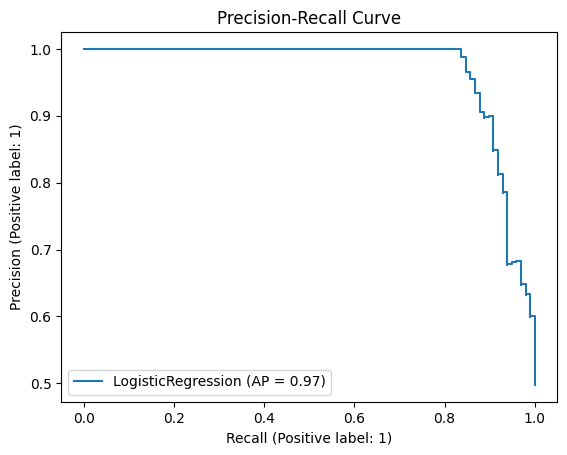

In [53]:
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

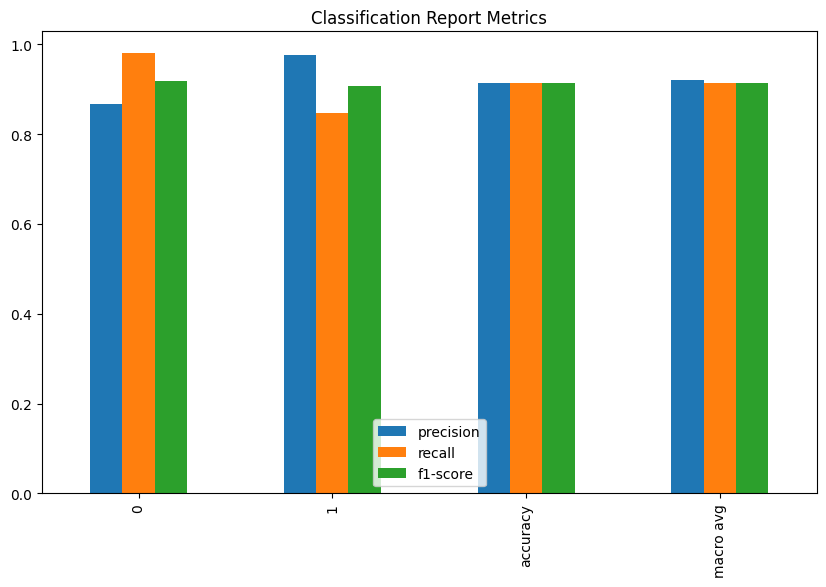

In [54]:
report = classification_report(y_test, ypred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.drop(['support'], axis=1).iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.show()

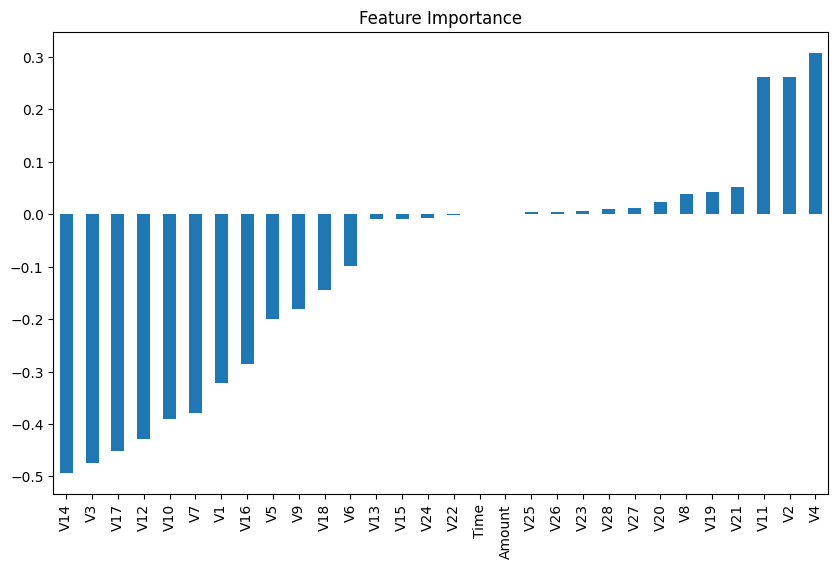

In [55]:
coefficients = pd.Series(model.coef_[0], index=x.columns)
coefficients.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

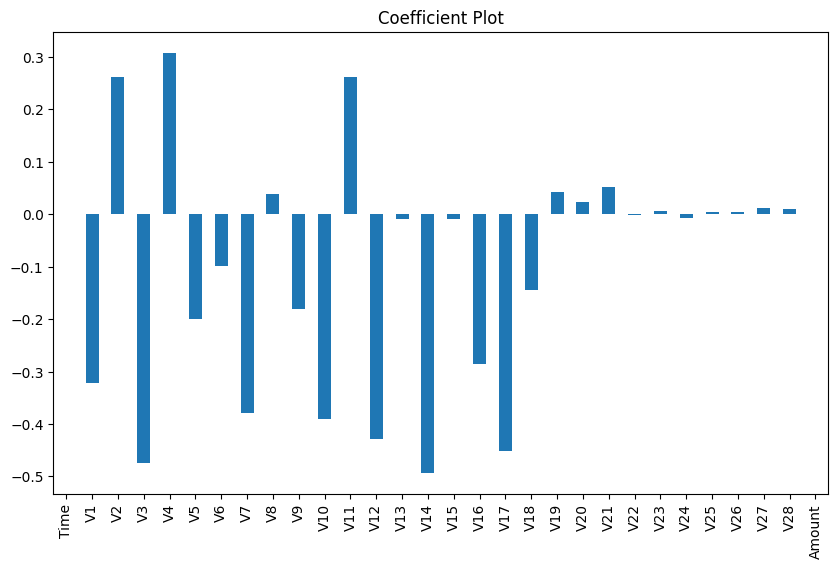

In [56]:
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Coefficient Plot')
plt.show()

#Advanced Analysis

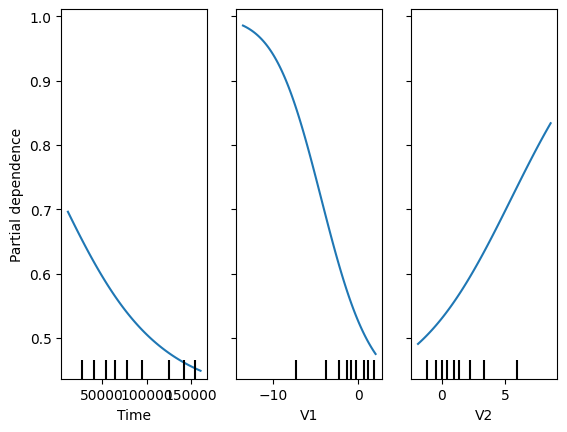

In [22]:
features = [0, 1, 2]  # Replace with relevant feature indices
PartialDependenceDisplay.from_estimator(model, x_train, features)
plt.show()

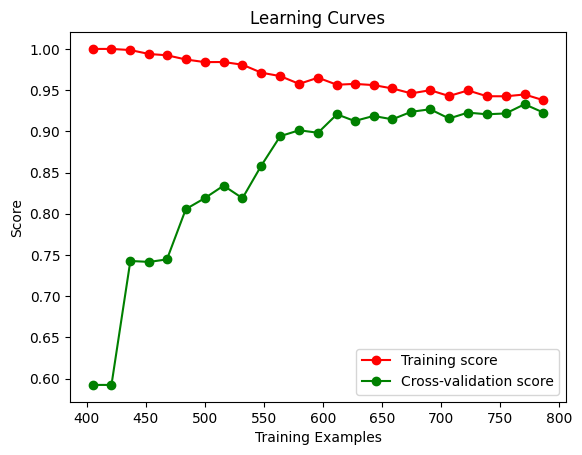

In [23]:
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

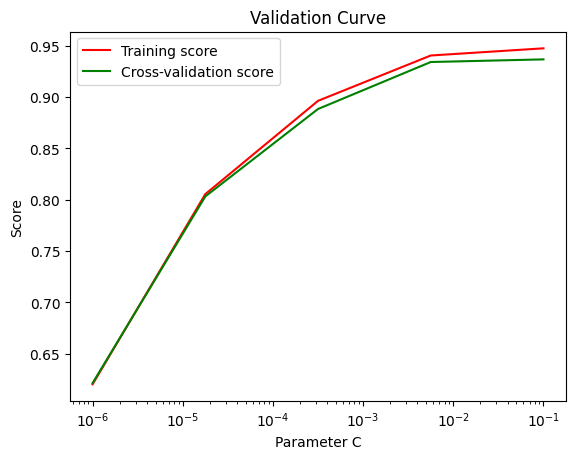

In [24]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(LogisticRegression(), x_train, y_train, param_name="C", param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.xscale('log')
plt.title('Validation Curve')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

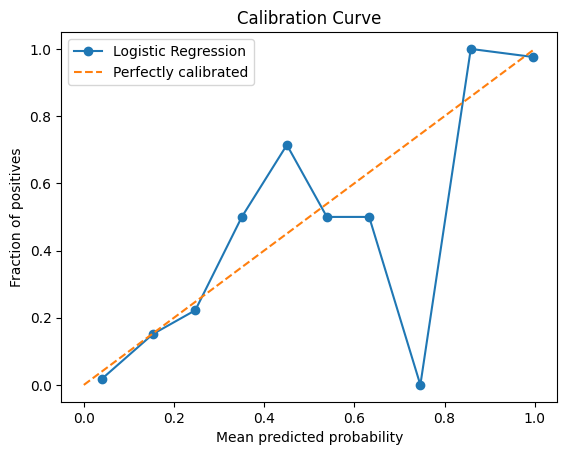

In [25]:
prob_true, prob_pred = calibration_curve(y_test, model.predict_proba(x_test)[:, 1], n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend(loc="best")
plt.show()

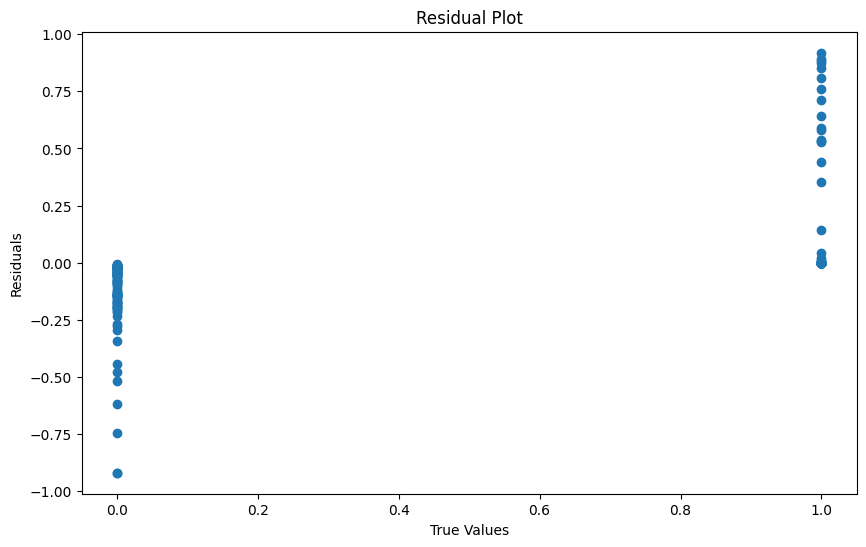

In [26]:
residuals = y_test - model.predict_proba(x_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

In [27]:
lift = pd.DataFrame()
lift['probability'] = model.predict_proba(x_test)[:, 1]
lift['true_label'] = y_test.values
lift.sort_values('probability', ascending=False, inplace=True)

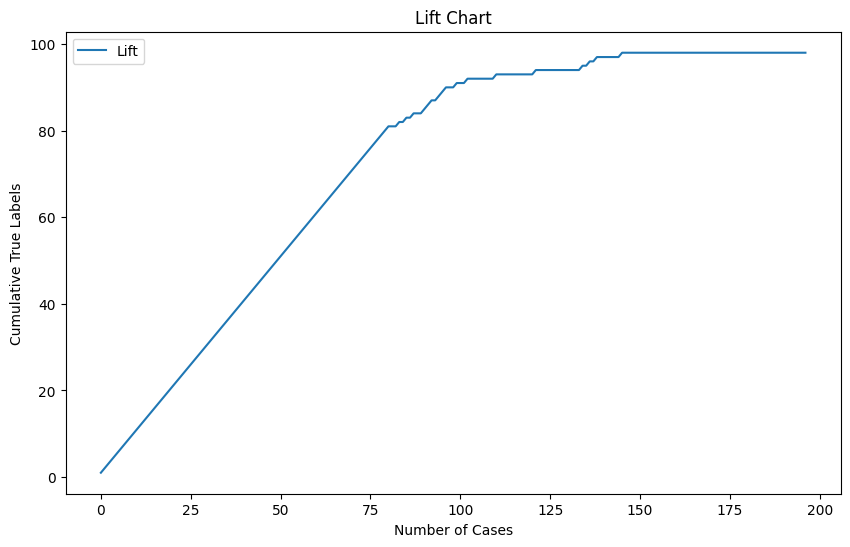

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(lift)), lift['true_label'].cumsum(), label='Lift')
plt.title('Lift Chart')
plt.xlabel('Number of Cases')
plt.ylabel('Cumulative True Labels')
plt.legend(loc='best')
plt.show()

In [29]:
accuracy = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9036


In [58]:
# Generate model predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [59]:
metrics = {
    'Metric': [
        'Accuracy',
        'Precision',
        'Recall',
        'F1 Score',
        'ROC-AUC',
        'PR-AUC',
        'Log Loss',
        'Matthews Correlation Coefficient',
        'Kappa Score'
    ],
    'Value': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba),
        average_precision_score(y_test, y_pred_proba),
        log_loss(y_test, y_pred_proba),
        matthews_corrcoef(y_test, y_pred),
        cohen_kappa_score(y_test, y_pred)
    ]
}

In [60]:
metrics_df = pd.DataFrame(metrics)

In [61]:
excel_path = '/content/drive/MyDrive/CreditCard_fraud_detection/metrics/metrics_summary.xlsx'
metrics_df.to_excel(excel_path, index=False)

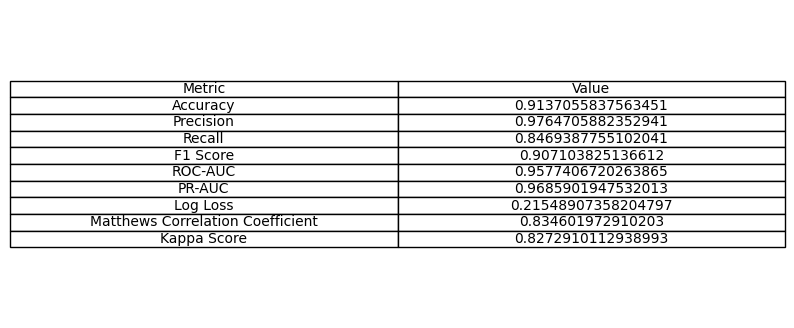

In [62]:
# Plot the metrics as a table and display as an image
fig, ax = plt.subplots(figsize=(10, 4))  # Set the size of the frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

# Display the table as an image
plt.show()